# Exploratory Spatial Data Analysis

A demo of Exploratory Spatial Data Analysis, using [PySAL](https://pysal.org) and [Seaborn](https://seaborn.pydata.org), among others. Data is on COVID-19 in Germany provided by RKI [here](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/917fc37a709542548cc3be077a786c17_0).

Let's load some libraries...

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import libpysal 
from libpysal import weights
from pysal.explore import esda
from pysal.viz import mapclassify

In [2]:
plt.rcParams['figure.figsize'] = [10, 10] # change standard figure size

... and some data:

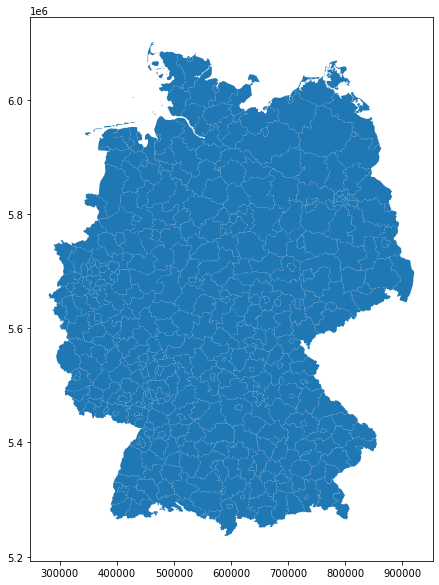

In [4]:
db = gpd.read_file('RKI_Corona_2020_06_17.gpkg')
db.plot();

In [5]:
db.head()

,inhabitants,death_rate,cases,deaths,cases_per_100k,state,county,cases_7days_per_100k,geometry
0,89504,6.818182,44,3,49.159814,Schleswig-Holstein,SK Flensburg,0.000000,"MULTIPOLYGON (((526513.753 6075133.412, 526547..."
1,247548,3.558719,281,10,113.513339,Schleswig-Holstein,SK Kiel,0.807924,"MULTIPOLYGON (((575841.569 6032148.032, 575869..."
2,217198,0.602410,166,1,76.427960,Schleswig-Holstein,SK Lübeck,0.000000,"MULTIPOLYGON (((623056.151 5983746.445, 623191..."
3,79487,2.564103,78,2,98.129254,Schleswig-Holstein,SK Neumünster,0.000000,"MULTIPOLYGON (((565015.652 6000637.513, 565128..."
4,133210,6.250000,64,4,48.044441,Schleswig-Holstein,LK Dithmarschen,1.501389,"MULTIPOLYGON (((479877.791 5990290.587, 479947..."


In [6]:
db.describe()

,inhabitants,death_rate,cases,deaths,cases_per_100k,cases_7days_per_100k
count,4.120000e+02,412.000000,412.000000,412.000000,412.000000,412.000000
mean,2.017689e+05,4.288436,455.737864,21.495146,225.364826,2.147733
std,1.717528e+05,2.702719,556.777393,28.676100,165.718323,4.209467
min,3.420900e+04,0.000000,19.000000,0.000000,32.621788,0.000000
25%,1.058390e+05,2.408905,159.000000,4.000000,119.171467,0.000000
50%,1.579305e+05,3.846154,316.500000,12.000000,185.713686,0.738553
75%,2.509708e+05,5.902989,568.500000,27.250000,283.069161,1.993869
max,1.841179e+06,14.950980,6609.000000,259.000000,1570.947810,32.165624


Let's make a

## Choropleth map of total cases

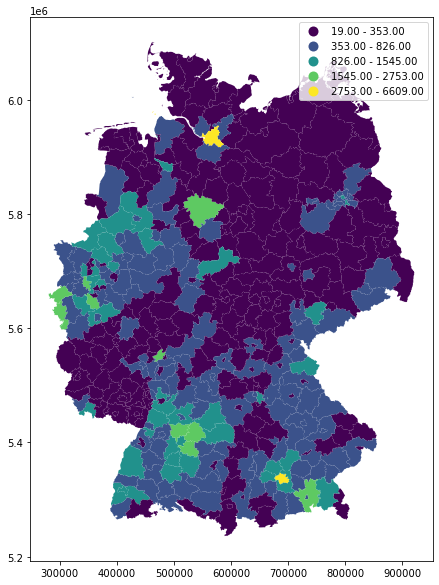

In [7]:
db.plot(column='cases', scheme='fisher_jenks', legend=True)

## Investigate non-spatial relationships

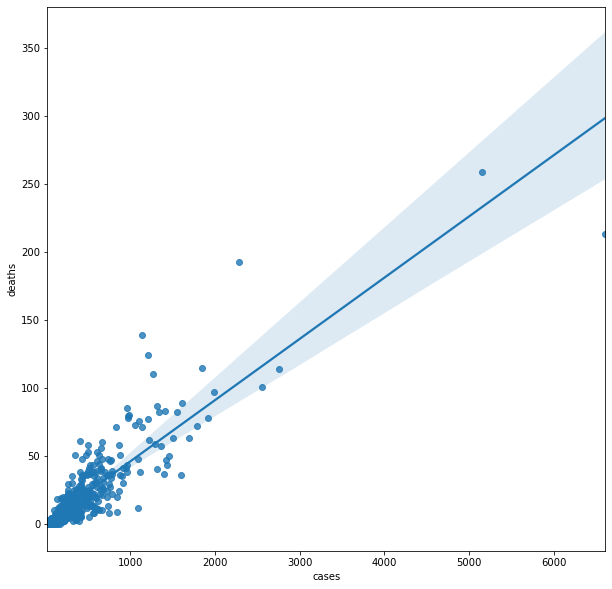

In [8]:
sns.regplot(x="cases", y="deaths", data=db )

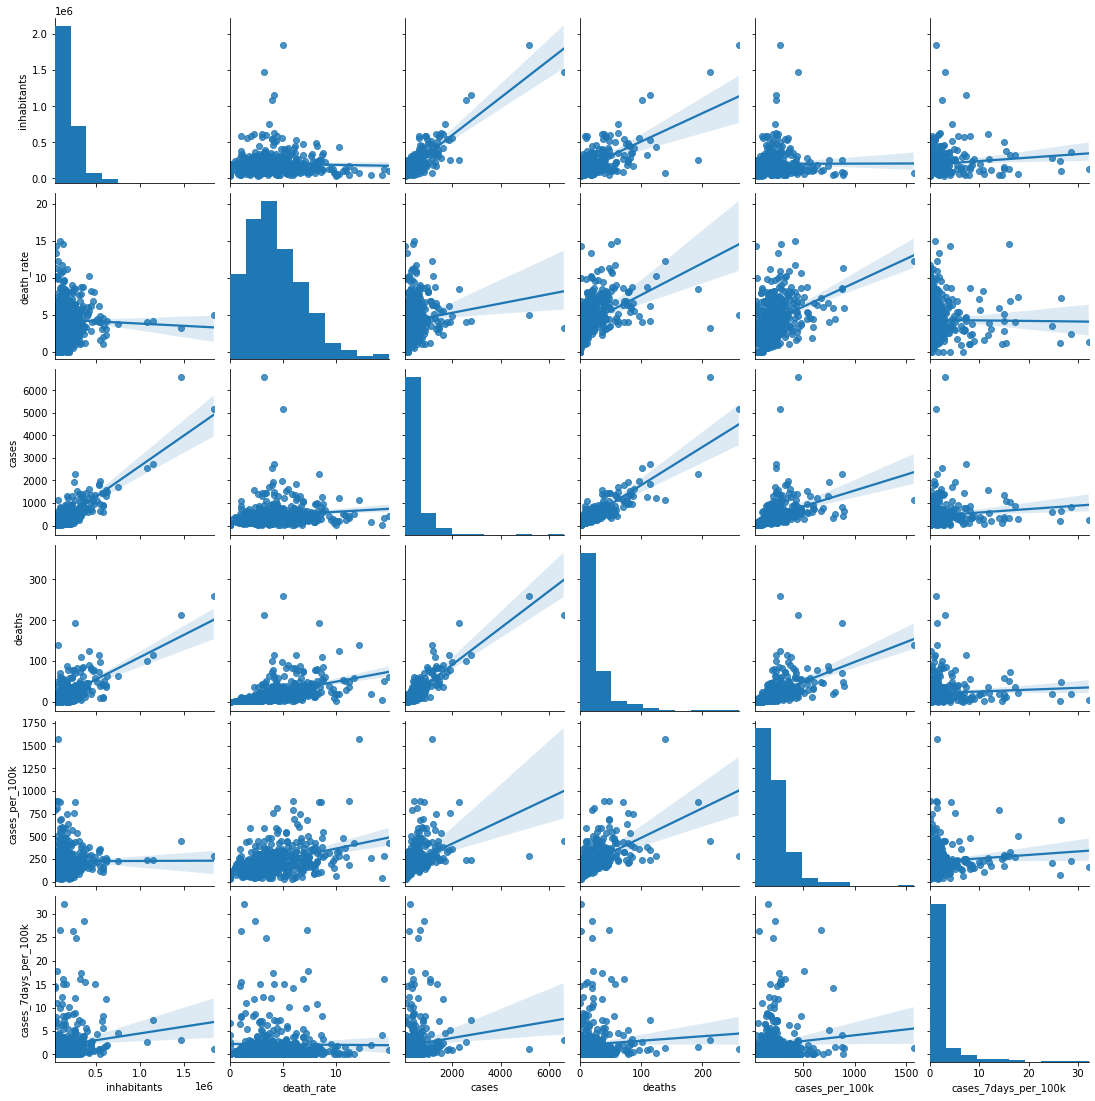

In [9]:
sns.pairplot(db, kind="reg")

# [Spatial Weights](http://darribas.org/gds_scipy16/ipynb_md/03_spatial_weights.html)

Spatial weights are central components of many areas of spatial analysis. In general terms, for a spatial data set composed of *n* locations (points, areal units, network edges, etc.), the spatial weights matrix expresses the potential for interaction between observations at each pair *i,j* of locations. There is a rich variety of ways to specify the structure of these weights, and PySAL supports the creation, manipulation and analysis of spatial weights matrices across three different general types:

- Contiguity Based Weights
- Distance Based Weights
- Kernel Weights

Let's take a look at a lattice example with fake data:

Now we can generate a contiguity matrix:

In [10]:
w_queen = weights.Queen.from_dataframe(db)
pd.DataFrame(w_queen.full()[0], 
             index=db['county'],
             columns=db['county'],
            ).astype(int)

county,SK Flensburg,SK Kiel,SK Lübeck,SK Neumünster,LK Dithmarschen,LK Herzogtum Lauenburg,LK Nordfriesland,LK Ostholstein,LK Pinneberg,LK Plön,...,SK Berlin Treptow-Köpenick,SK Berlin Pankow,SK Berlin Neukölln,SK Berlin Lichtenberg,SK Berlin Marzahn-Hellersdorf,SK Berlin Spandau,SK Berlin Steglitz-Zehlendorf,SK Berlin Mitte,SK Berlin Friedrichshain-Kreuzberg,SK Berlin Tempelhof-Schöneberg
county,,,,,,,,,,,,,,,,,,,,,
SK Flensburg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SK Kiel,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SK Lübeck,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
SK Neumünster,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
LK Dithmarschen,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SK Berlin Spandau,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
SK Berlin Steglitz-Zehlendorf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
SK Berlin Mitte,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


☝️ Rook's case vs. Queen's case: 

- In Rook's case, only sees shared **edges** lead to a connection
- In Queen's case, also shared **vertices** (points) lead to a connection

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe052d38450>)

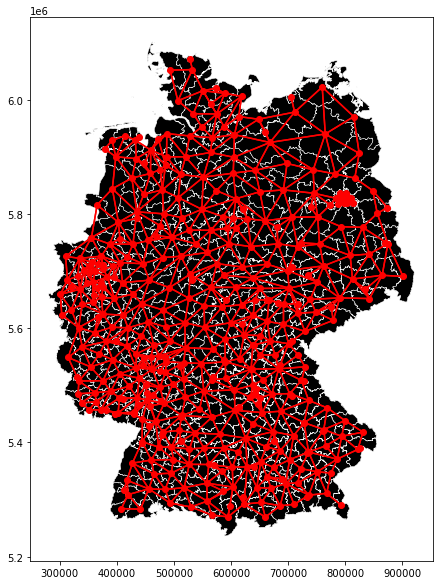

In [11]:
fig, ax = plt.subplots(1, 1)

db.plot(color='k', edgecolor='w', linewidth=0.5, ax=ax)
w_queen.plot(db, color='red', ax=ax )

# Spatial Autocorrelation

[Moran's I](https://en.wikipedia.org/wiki/Moran%27s_I)

In [12]:
moran = esda.Moran(db['cases'], w_queen)
print(moran.I, moran.p_sim)

0.2492787072384568 0.001
